## Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

## Loading data

In [3]:
data = pd.read_csv("/home/shaik/Downloads/cavaitesmssold_bi.csv")

In [4]:
data.head()

,dateofpurch,item,transactionid
0,2014-04-27,Greens&Grains,1cb598ac-24ff-4734-ab8d-b4422c467870
1,2014-04-27,Chicken,1cb598ac-24ff-4734-ab8d-b4422c467870
2,2014-04-27,chips,1cb598ac-24ff-4734-ab8d-b4422c467870
3,2014-04-27,Salad,1cb598ac-24ff-4734-ab8d-b4422c467870
4,2014-04-27,braised_lamb,1cb598ac-24ff-4734-ab8d-b4422c467870


In [5]:
data["dateofpurch"] = pd.to_datetime(data["dateofpurch"])
data["year_purch"] = data["dateofpurch"].apply(lambda x : x.year)
data["month_purch"] = data["dateofpurch"].apply(lambda x : x.month)
data["dayofweek_purch"] = data["dateofpurch"].apply(lambda x : x.dayofweek)

In [6]:
print("Data has {} rows and {} columns".format(data.shape[0],data.shape[1]))

Data has 1998030 rows and 6 columns


In [7]:
print("Number of unique transactions : {}".format(len(np.unique(data.transactionid))))

Number of unique transactions : 658594


In [8]:
print("Items solds are: {}".format(np.unique(data.item)))

Items solds are: ['Bowl' 'Chicken' 'Greens&Grains' 'Minis' 'Pita' 'Salad' 'braised_beef'
 'braised_lamb' 'chips' 'cookie' 'falafel' 'lamb_sliders' 'large_drink'
 'meatballs' 'small_drink' 'soup']


In [9]:
print("Dataset contain transaction data for {} years".format(np.unique(data.year_purch)))

Dataset contain transaction data for [2012 2013 2014 2015] years


## Analysis on Transaction data

### Year

#### Counting number of unique transactions made per year.  We have only one month data for year 2012 and incomplete data for december month for 2015. Number of transactions in 2013 and 2014 looks almost equal. This says we are consistent in each year. We should look for chnaces to increase the sales.

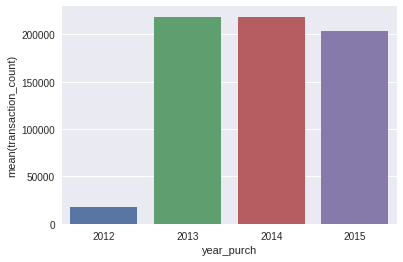

In [10]:
#Number of unique transactions made per year
yearwise_transactions = data[["year_purch","transactionid"]].groupby(["year_purch"]).aggregate(lambda x : 
                                                                                               len(np.unique(x)))
#Ressing index to form a Dataframe
yearwise_transactions.reset_index(inplace=True)
#rename the columns
yearwise_transactions.columns = ["year_purch","transaction_count"]
#Barplot
sns.barplot(x="year_purch",y="transaction_count",data=yearwise_transactions)

### Monthly sales

### Plotting monthly transaction. Excluding 2012 and 2015 due to incpmpletness of data. We can see that number of transactions in Feb is less compared to ther months. This can be due to number of days present in month are less. 

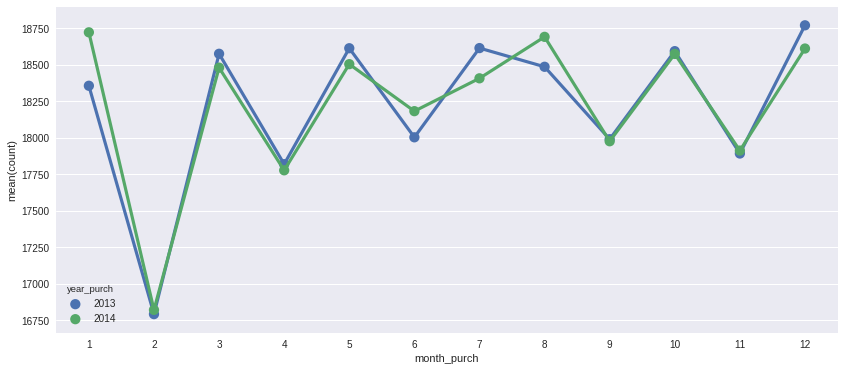

In [32]:

monthwise_transactions = data[["year_purch","month_purch","transactionid"]].groupby(["year_purch","month_purch"]).aggregate(lambda x : len(np.unique(x)))

monthwise_transactions.reset_index(inplace=True)
monthwise_transactions.columns = ["year_purch","month_purch","count"]
monthwise_transactions = monthwise_transactions[monthwise_transactions["year_purch"].isin([2013,2014])]
plt.figure(figsize=(14,6))
sns.pointplot(x="month_purch",y="count",data=monthwise_transactions,hue="year_purch")
plt.show()


### In above plot we can observe that number of sales are following trend of increasing and decreasing every alternate months. Lets see if this is due to difference in number of days. 

In [33]:
#Creating dictionary of months and days 
months_days = {1:31, 2:28,3:31,4:30,5:31,6:30,7:31,8:31,9:30,10:31,11:30,12:31}
#Mapping months with days
monthwise_transactions["days_month"] = monthwise_transactions["month_purch"].replace(months_days)
#Dividing number of transactions with number of days in month
monthwise_transactions["perday_purch"] = monthwise_transactions["count"]/monthwise_transactions["days_month"]

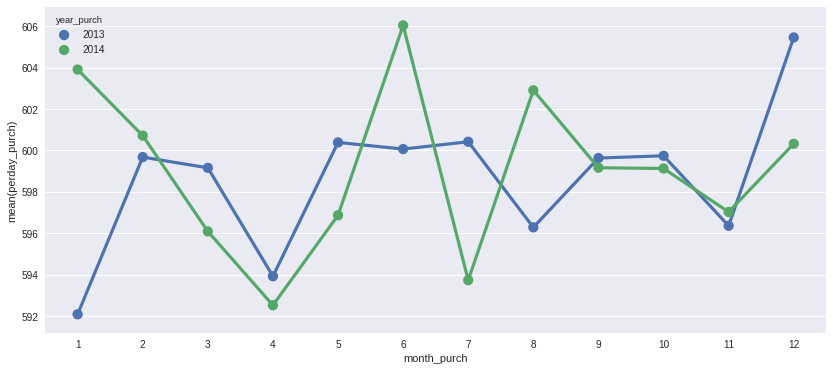

In [36]:
plt.figure(figsize=(14,6))
sns.pointplot(x="month_purch",y="perday_purch",data=monthwise_transactions,hue="year_purch")
plt.show()

### Though we see the deviation in the plot, it is mainly due to scale of Y-axis. Average number of sale per day in each months are almost same with value lying between 592 and 606 

### Sales as per week of day 

### Plotting the number of sales per weekday. We can see that on an average number of sales on evey weekday reamin same

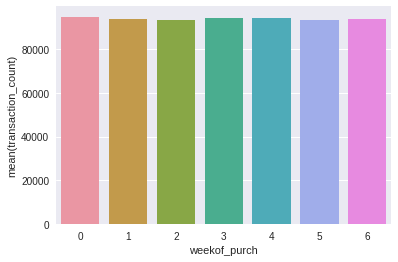

In [42]:
#Grouping by day of week
weekofday_transactions = data[["dayofweek_purch","transactionid"]].groupby(["dayofweek_purch"]).aggregate(lambda x : 
                                                                                               len(np.unique(x)))
#Converting series to dataframe
weekofday_transactions.reset_index(inplace=True)
#Renaming columns
weekofday_transactions.columns = ["weekof_purch","transaction_count"]
#plotting
sns.barplot(x="weekof_purch",y="transaction_count",data=weekofday_transactions)

## Sales per item and category 

### Counting number of transaction made for each item. We can see that chiken is ordered most and drinks being least. 

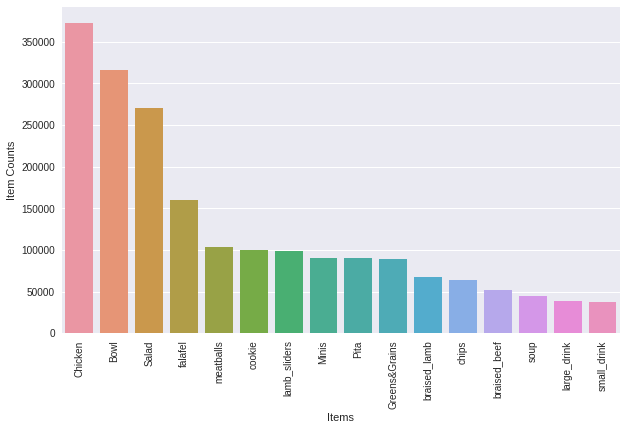

In [46]:
#Counting each item
item_count = data.item.value_counts()
item_count = item_count.reset_index()
#rename columns
item_count.columns = ["item_name","counts"]
#Setting figure size
plt.figure(figsize=(10,6))
#plot
sns.barplot(x=item_count.item_name,y=item_count.counts)
#Naming the labels
plt.xlabel("Items")
plt.ylabel("Item Counts")
plt.xticks(rotation="vertical")
plt.show()

### Lets dive deep and create categories for items. Came up with following categories reffering CAVA website
### Side, Drinks, Protiens, Meal_Container

In [51]:
sides = ["soup","cookie","chips"]
drinks = ["large_drink","small_drink"]
protein = ["Chicken","falafel","meatballs","braised_lamb","braised_beef","lamb_sliders"]
meal_container = ["Bowl","Salad","Greens&Grains","Minis","Pita"]

In [52]:
item_count.loc[item_count["item_name"].isin(sides),"type"] = "sides"
item_count.loc[item_count["item_name"].isin(drinks),"type"] = "drinks"
item_count.loc[item_count["item_name"].isin(protein),"type"] = "protein"
item_count.loc[item_count["item_name"].isin(meal_container),"type"] = "meal_container"

### In Sides category cookies are sold most 

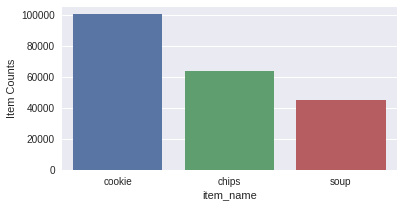

In [53]:
plt.figure(figsize=(6,3))
sns.barplot(x="item_name",y="counts",data= item_count[item_count["type"] == "sides"])
plt.ylabel("Item Counts")

### In drinks category there is not much difference between large and small drink

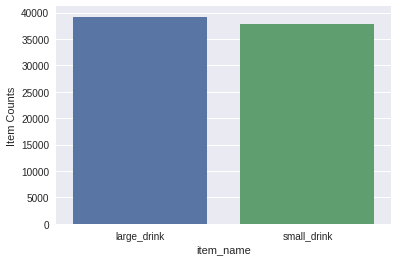

In [134]:
sns.barplot(x="item_name",y="counts",data= item_count[item_count["type"] == "drinks"])
plt.ylabel("Item Counts")

### In Protein category chicken is sold most followed by falafel. 

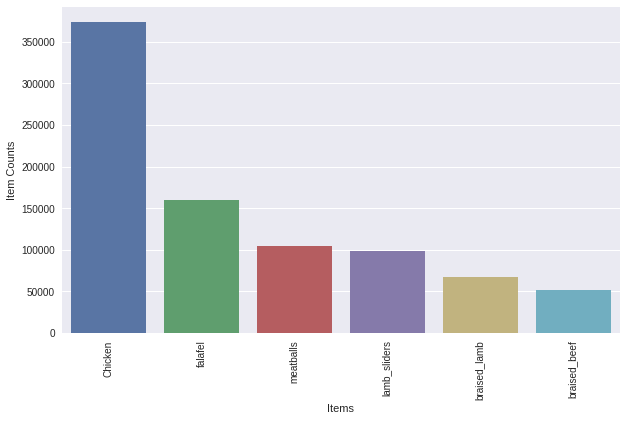

In [54]:
#setting the figure size
plt.figure(figsize=(10,6))
#plot
sns.barplot(x="item_name",y="counts",data= item_count[item_count["type"] == "protein"])
#Labeling
plt.xlabel("Items")
plt.ylabel("Item Counts")
plt.xticks(rotation="vertical")
plt.show()

### In this Category Bowl is sold most by Salad. Mins, Pita and Greens&grains have almost same transactions

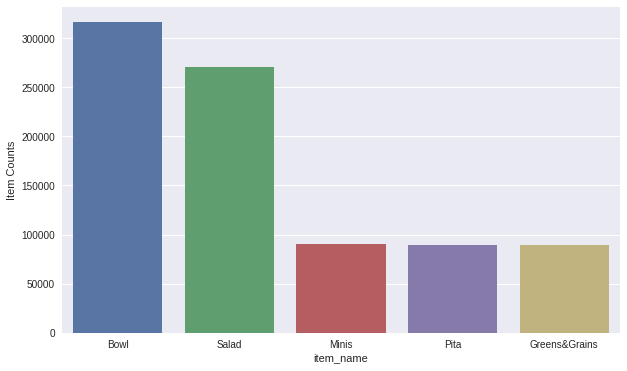

In [57]:
#setting the figure size
plt.figure(figsize=(10,6))
#plot
sns.barplot(x="item_name",y="counts",data= item_count[item_count["type"] == "meal_container"] )
plt.ylabel("Item Counts")
plt.show()

## Pairwaise analysis

### Lets look at what goes best with each item in category to other category

### Creating a pivot table with transactionid and item . This would give a list of items purchased in each transaction 

In [60]:
pivot_data = data[["transactionid","item"]].pivot_table(index='transactionid', columns='item',
                                           aggfunc=len,fill_value = 0)

### Below is the pie chart with all items in Protein category that goes with "Bowl". We can see that chiken and bowl makes a good combination

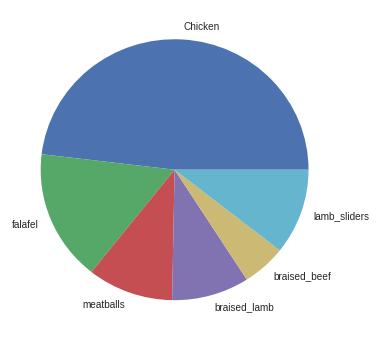

In [61]:
#filtering transactions which invole bowl
bowl = pivot_data.ix[pivot_data.Bowl !=0][protein].sum(axis=0).reset_index()
#Renaming columns
bowl.columns = ["item","count"]
plt.figure(figsize=(6,6))
plt.pie(bowl["count"],labels=bowl["item"])
plt.show()

### Creating a function which accepts the items and category and plots the sales which involve those items and each of other items in given category

In [62]:
def items_assosiation_plot(item_1 = "Salad",item_2=None, category = sides) :
    ''' Function to plot the graphs for combination of items 
    
    '''
    if item_2 != None :
        piv = pivot_data.ix[(pivot_data[item_1] !=0) & (pivot_data[item_2] !=0)][category].sum(axis=0).reset_index()
    else :
        piv = pivot_data.ix[pivot_data[item_1] !=0][category].sum(axis=0).reset_index()
    piv.columns = ["item","count"]
    piv.sort_values(by="count",inplace=True,ascending=False)
    plt.figure(figsize=(10,6))
    sns.barplot(x=piv["item"], y=piv["count"])
    plt.show()

### Chiken goes will well with Bowl 

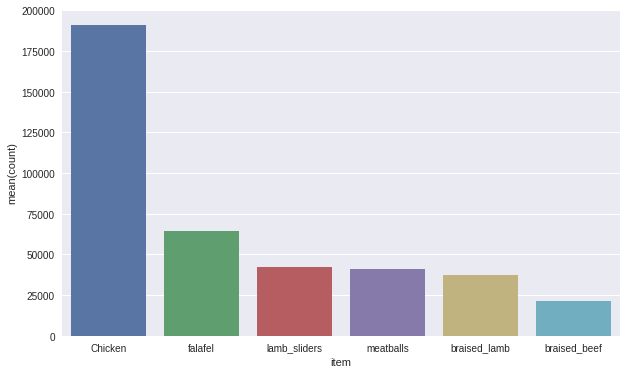

In [63]:
items_assosiation_plot(item_1="Bowl", category=protein)

### Even in Salad, Chiken is order most. But the difference in  orders with chiken and falafel is less compared to orders with Bowl 

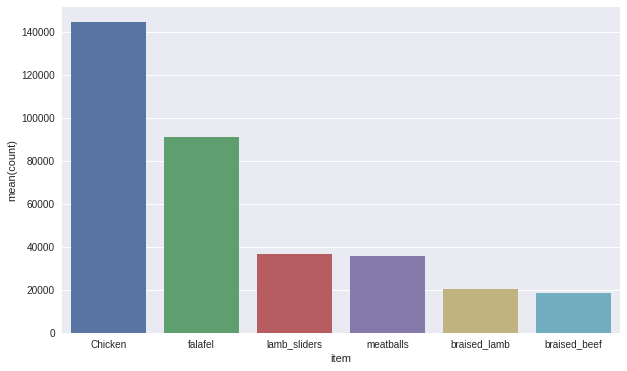

In [67]:
items_assosiation_plot(item_1="Salad", category=protein)

### Falafel dose not seems to be among top choices for people who ordered pita

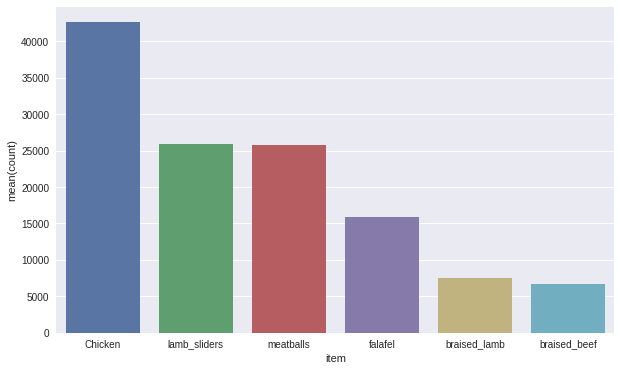

In [68]:
items_assosiation_plot(item_1="Pita", category=protein)

### People who order Greens&grains are less likely to take drinks

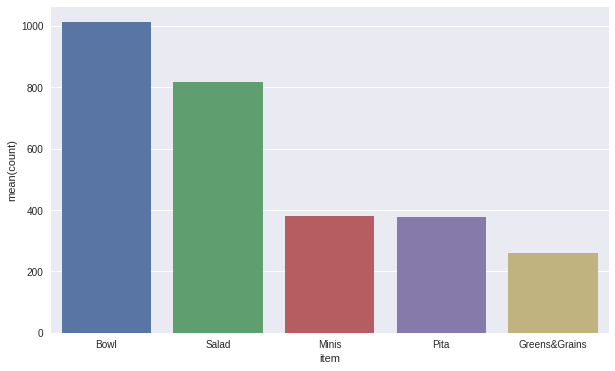

In [69]:
items_assosiation_plot(item_1="large_drink",item_2="small_drink", category=meal_container)